### Note

**This exercise has 3 coding parts, this is part 2**

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [84]:
#load the data and save each item separately
data = np.load('clustering.npz')
l = data.files
X = []

for item in l:
    #print(item)
    #print(data[item])
    if item == 'X':
        X.append(data[item])

In [85]:
X =  np.matrix(np.array(X))

In [86]:
#convert X_train and X_valid to dataframes for easy use
X_df = pd.DataFrame(X)
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,718,719,720,721,722,723,724,725,726,727
0,-2.234894,2.237528,0.237336,0.311895,-0.998490,-0.583594,-0.761421,0.000669,0.727034,0.464949,...,-0.451060,2.541879,0.632597,0.475477,0.107240,-0.722374,-0.464377,-0.006093,0.547901,-0.718039
1,0.127795,0.831839,2.467283,0.827069,-0.701733,1.466837,0.327733,-0.007227,1.111531,-0.488463,...,0.665436,-1.461179,1.010667,-2.218398,0.310688,0.752076,0.479279,-0.267272,1.682050,0.345045
2,0.077790,-1.263611,-0.855423,0.525997,0.381537,-0.846511,-0.810061,0.000674,-1.368654,0.570735,...,0.574723,-4.049524,-0.864345,1.762192,0.370094,0.609131,0.037525,-1.301591,0.048243,0.475642
3,2.530288,2.901235,1.012635,-0.358454,0.882759,0.500321,1.026518,-0.002748,0.432565,-0.108880,...,0.445240,-2.340424,0.510527,-1.141119,0.480753,0.188209,0.719457,-0.590707,0.413130,0.807370
4,1.073639,1.504085,0.919606,-0.570293,-0.008195,1.073666,0.435176,-0.006201,0.731633,-0.531181,...,0.688533,-0.943360,-0.048044,-1.454860,-0.519045,0.179215,0.131521,0.304710,0.838073,0.314789


In [87]:
X_scaler = pd.DataFrame(StandardScaler().fit_transform(X))
X_scaler.head()

,0,1,2,3,4,5,6,7,8,9,...,718,719,720,721,722,723,724,725,726,727
0,-1.642147,1.640585,0.224005,0.405658,-1.462411,-0.775871,-0.915185,0.007862,0.591675,0.815348,...,-1.001304,0.667114,0.902947,0.352529,0.173169,-0.866449,-0.973216,-0.005202,0.428877,-1.008791
1,0.093591,0.614249,2.297387,1.063975,-1.026459,1.919787,0.391406,-0.148430,0.903631,-0.861672,...,1.489464,-0.382820,1.445189,-1.608103,0.490845,0.898351,1.005642,-0.166364,1.306488,0.482887
2,0.056855,-0.915702,-0.792030,0.679248,0.564920,-1.121522,-0.973536,0.007964,-1.108629,1.001422,...,1.287095,-1.061699,-1.244021,1.289013,0.583604,0.727257,0.079277,-0.804598,0.042240,0.666136
3,1.858571,2.125178,0.944871,-0.450948,1.301240,0.649128,1.229695,-0.059764,0.352762,-0.193999,...,0.998233,-0.613431,0.727870,-0.824047,0.756393,0.223447,1.509298,-0.365942,0.324591,1.131603
4,0.788451,1.105077,0.858373,-0.721647,-0.007617,1.402893,0.520299,-0.128110,0.595407,-0.936811,...,1.540991,-0.247005,-0.073253,-1.052392,-0.804745,0.212681,0.276388,0.186582,0.653415,0.440433


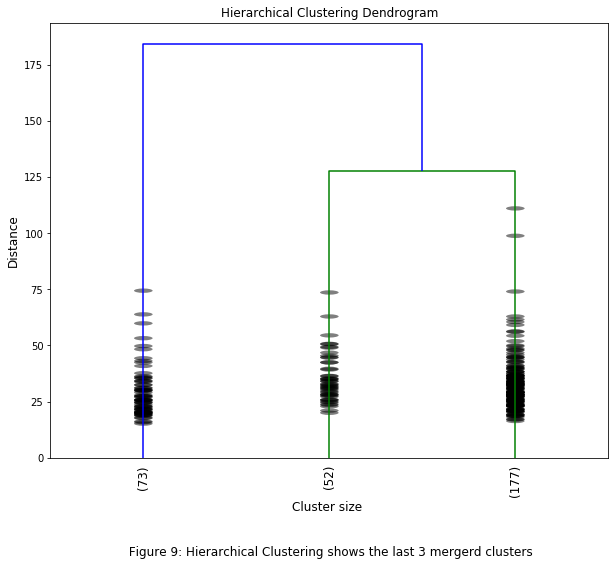

In [180]:
#the linkage matrix
plt.figure(figsize=(10,8))
H = linkage(X_scaler,'ward')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size \n\n\n Figure 9: Hierarchical Clustering shows the last 3 mergerd clusters', fontsize=12)
plt.ylabel('Distance', fontsize=12)
dendrogram(
    H,
    truncate_mode='lastp',  # show last 3 merged clusters
    p=3,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # a distribution impression in truncated branches
)
plt.show();

In [89]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
k=3
cluster = fcluster(H, k, criterion='maxclust')
#cluster[0:30:,]
#plt.figure(figsize=(10, 8))
#plt.scatter(X_scaler.iloc[:,0], X_scaler.iloc[:,1],c=cluster, cmap='prism')
#plt.title('Soil Data - Hierarchical Clutering')
#plt.show()

In [90]:
# New Dataframe called cluster
c_Hierarchical = pd.DataFrame(cluster)
# Adding the hierarchical clustering to dataset
data = X_df
data['cluster'] = c_Hierarchical
data.head()

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,cluster
0,-2.234894,2.237528,0.237336,0.311895,-0.998490,-0.583594,-0.761421,0.000669,0.727034,0.464949,...,2.541879,0.632597,0.475477,0.107240,-0.722374,-0.464377,-0.006093,0.547901,-0.718039,2
1,0.127795,0.831839,2.467283,0.827069,-0.701733,1.466837,0.327733,-0.007227,1.111531,-0.488463,...,-1.461179,1.010667,-2.218398,0.310688,0.752076,0.479279,-0.267272,1.682050,0.345045,3
2,0.077790,-1.263611,-0.855423,0.525997,0.381537,-0.846511,-0.810061,0.000674,-1.368654,0.570735,...,-4.049524,-0.864345,1.762192,0.370094,0.609131,0.037525,-1.301591,0.048243,0.475642,3
3,2.530288,2.901235,1.012635,-0.358454,0.882759,0.500321,1.026518,-0.002748,0.432565,-0.108880,...,-2.340424,0.510527,-1.141119,0.480753,0.188209,0.719457,-0.590707,0.413130,0.807370,3
4,1.073639,1.504085,0.919606,-0.570293,-0.008195,1.073666,0.435176,-0.006201,0.731633,-0.531181,...,-0.943360,-0.048044,-1.454860,-0.519045,0.179215,0.131521,0.304710,0.838073,0.314789,3


In [91]:
data.set_index('cluster')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,cluster
0,-2.234894,2.237528,0.237336,0.311895,-0.998490,-0.583594,-0.761421,0.000669,0.727034,0.464949,...,2.541879,0.632597,0.475477,0.107240,-0.722374,-0.464377,-0.006093,0.547901,-0.718039,2
1,0.127795,0.831839,2.467283,0.827069,-0.701733,1.466837,0.327733,-0.007227,1.111531,-0.488463,...,-1.461179,1.010667,-2.218398,0.310688,0.752076,0.479279,-0.267272,1.682050,0.345045,3
2,0.077790,-1.263611,-0.855423,0.525997,0.381537,-0.846511,-0.810061,0.000674,-1.368654,0.570735,...,-4.049524,-0.864345,1.762192,0.370094,0.609131,0.037525,-1.301591,0.048243,0.475642,3
3,2.530288,2.901235,1.012635,-0.358454,0.882759,0.500321,1.026518,-0.002748,0.432565,-0.108880,...,-2.340424,0.510527,-1.141119,0.480753,0.188209,0.719457,-0.590707,0.413130,0.807370,3
4,1.073639,1.504085,0.919606,-0.570293,-0.008195,1.073666,0.435176,-0.006201,0.731633,-0.531181,...,-0.943360,-0.048044,-1.454860,-0.519045,0.179215,0.131521,0.304710,0.838073,0.314789,3


In [92]:
#groupby cluters
d = data.groupby('cluster').mean()
d

,0,1,2,3,4,5,6,7,8,9,...,718,719,720,721,722,723,724,725,726,727
cluster,,,,,,,,,,,,,,,,,,,,,
1,-0.258760,-0.640469,0.440458,-0.302112,0.142910,0.106490,0.024889,0.009140,0.365889,-0.298618,...,-0.013625,4.746277,0.050365,0.829682,-0.101584,0.445238,0.020180,2.298776,-0.128595,0.131724
2,-0.145069,0.557891,-0.807933,0.341839,-0.145611,-0.101145,0.670312,-0.003895,-0.438708,0.500541,...,-0.161905,-1.695441,0.356102,-0.756211,0.560143,-1.026632,-0.169263,-0.618390,-0.700389,-0.097818
3,0.150020,0.084127,0.049585,0.014689,-0.021298,-0.003001,-0.204696,-0.002162,-0.025818,-0.021485,...,0.049393,-1.462155,-0.120219,-0.135192,-0.128916,0.120581,0.040926,-0.762423,0.247976,-0.024049


In [93]:
#find most important features (5) for each cluster
d.apply(lambda s, n: s.nlargest(n).index, axis=1, n=5)

cluster
1    Index([61, 415, 492, 318, 719], dtype='object')
2     Index([136, 628, 309, 21, 85], dtype='object')
3     Index([676, 85, 402, 68, 656], dtype='object')
dtype: object

In [94]:
#find most important features (5) for each cluster
d.apply(lambda s, n: pd.Series(s.nlargest(n)), axis=1, n=5)

,21,61,68,85,136,309,318,402,415,492,628,656,676,719
cluster,,,,,,,,,,,,,,
1,NaN,7.77927,NaN,NaN,NaN,NaN,5.048125,NaN,7.151374,6.251888,NaN,NaN,NaN,4.746277
2,1.615399,NaN,NaN,1.610508,2.345517,1.669016,NaN,NaN,NaN,NaN,1.713233,NaN,NaN,NaN
3,NaN,NaN,1.104973,1.647912,NaN,NaN,NaN,1.168066,NaN,NaN,NaN,0.999524,2.021388,NaN


In [95]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,cluster
0,-2.234894,2.237528,0.237336,0.311895,-0.998490,-0.583594,-0.761421,0.000669,0.727034,0.464949,...,2.541879,0.632597,0.475477,0.107240,-0.722374,-0.464377,-0.006093,0.547901,-0.718039,2
1,0.127795,0.831839,2.467283,0.827069,-0.701733,1.466837,0.327733,-0.007227,1.111531,-0.488463,...,-1.461179,1.010667,-2.218398,0.310688,0.752076,0.479279,-0.267272,1.682050,0.345045,3
2,0.077790,-1.263611,-0.855423,0.525997,0.381537,-0.846511,-0.810061,0.000674,-1.368654,0.570735,...,-4.049524,-0.864345,1.762192,0.370094,0.609131,0.037525,-1.301591,0.048243,0.475642,3
3,2.530288,2.901235,1.012635,-0.358454,0.882759,0.500321,1.026518,-0.002748,0.432565,-0.108880,...,-2.340424,0.510527,-1.141119,0.480753,0.188209,0.719457,-0.590707,0.413130,0.807370,3
4,1.073639,1.504085,0.919606,-0.570293,-0.008195,1.073666,0.435176,-0.006201,0.731633,-0.531181,...,-0.943360,-0.048044,-1.454860,-0.519045,0.179215,0.131521,0.304710,0.838073,0.314789,3


### Classification to measuer feature importance

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X = data.drop(['cluster'], axis=1)
y = data['cluster']

In [185]:
#split train and test data to measure the performance of the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [187]:
#use XGB classifer
from xgboost import XGBClassifier
from xgboost import plot_importance

m = XGBClassifier()
m.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [188]:
#prediction 
m.predict(X_test)
m.score(X_test, y_test)

0.9672131147540983

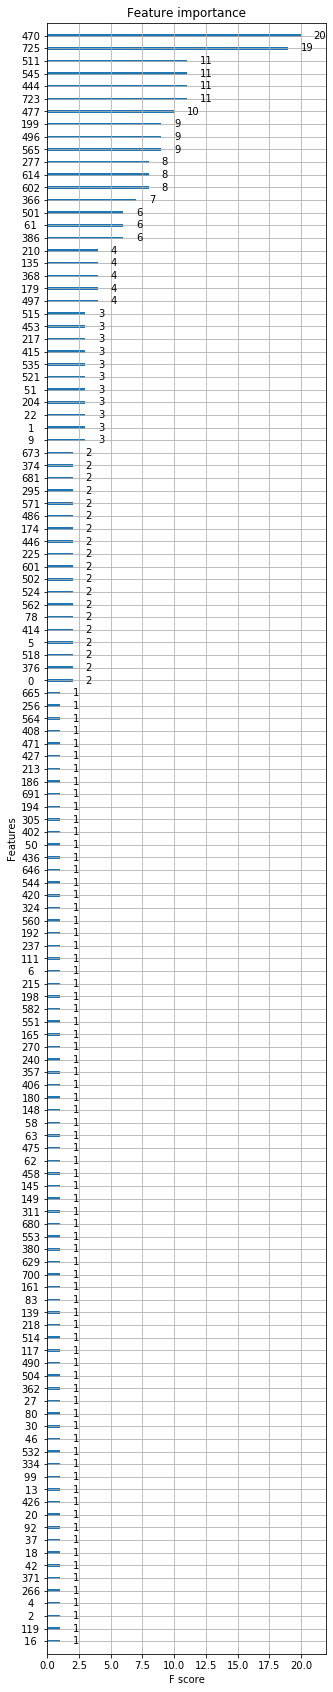

In [183]:
# plot feature importance
plt.rcParams["figure.figsize"] = (5, 30)
plot_importance(m)
plt.show();

- The features are automatically named according to their index 